In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
import pandas as pd
from sklearn.dummy import DummyClassifier

seaborn.set()

In [37]:
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('/Users/daisyabbott/Desktop/LA-Crime/archive/crime_in_la.csv')
df.head(5)

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


Trying to predict: Area, or weapon used 

In [19]:
# create feature list and separate into catagorical and numerical features as well as identify a target (this case time)
feature_list = ['Vict Sex',
            'Vict Descent','Weapon Used Cd', 'TIME OCC', 'Crm Cd', 'AREA', 'Vict Age', 'LOCATION']
target = 'Weapon Used Cd'
# Categorical features
cat = ['Vict Sex','Vict Descent', 'TIME OCC', 'LOCATION']
# Numeric features
num = ['Crm Code', 'AREA', 'Weapon Used Cd', 'Vict Age']

In [20]:
# create data frame from feature list
temp = df[feature_list]
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,F,B,400.0,22:30,624,3,36,1100 W 39TH PL
1,M,H,500.0,03:30,624,1,25,700 S HILL ST
2,F,W,500.0,17:30,745,15,76,5400 CORTEEN PL
3,X,X,500.0,04:15,740,19,31,14400 TITUS ST
4,F,H,500.0,00:30,121,1,25,700 S BROADWAY
...,...,...,...,...,...,...,...,...
495405,M,W,500.0,01:00,341,19,37,14000 BALBOA BL
495406,F,H,500.0,12:10,421,19,48,8400 VAN NUYS BL
495407,X,X,500.0,15:30,510,10,0,18800 SHERMAN WY
495408,X,X,500.0,20:00,510,11,0,4000 FOUNTAIN AV


In [21]:
# drop null values
temp = temp.dropna()
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,F,B,400.0,22:30,624,3,36,1100 W 39TH PL
1,M,H,500.0,03:30,624,1,25,700 S HILL ST
2,F,W,500.0,17:30,745,15,76,5400 CORTEEN PL
3,X,X,500.0,04:15,740,19,31,14400 TITUS ST
4,F,H,500.0,00:30,121,1,25,700 S BROADWAY
...,...,...,...,...,...,...,...,...
495405,M,W,500.0,01:00,341,19,37,14000 BALBOA BL
495406,F,H,500.0,12:10,421,19,48,8400 VAN NUYS BL
495407,X,X,500.0,15:30,510,10,0,18800 SHERMAN WY
495408,X,X,500.0,20:00,510,11,0,4000 FOUNTAIN AV


In [71]:
#### DIDN NOT WORK TO RUN, RAN FOREVER:  OneHot encode categorical vars
#temp_encoded = pd.get_dummies(temp, columns=cat, drop_first=True)

# Show first 5 rows of df
#temp_encoded.head(5)


In [72]:
## DIDNT WORK TO RUN, RAN FOREVER
# another attempt at one hot encoding the cat vars
#features = temp[cat]
#features = pd.get_dummies(features)
#features

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical variable
for col in cat:
    temp[col] = label_encoder.fit_transform(temp[col])

# Display the first few rows of the encoded dataframe
temp.head()


,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,0,1,400.0,1349,624,3,36,4590
1,2,6,500.0,209,624,1,25,41655
2,0,16,500.0,1049,745,15,76,36174
3,3,17,500.0,254,740,19,31,11991
4,0,6,500.0,29,121,1,25,41620


In [23]:
# Function to categorize age into decades
def categorize_decade(age):
    return (age // 10) * 10


In [24]:
ages = temp['Vict Age']
# Create a new column 'Decade' based on the decade labels
temp['Vict Age'] = ages.apply(categorize_decade)
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,0,1,400.0,1349,624,3,30,4590
1,2,6,500.0,209,624,1,20,41655
2,0,16,500.0,1049,745,15,70,36174
3,3,17,500.0,254,740,19,30,11991
4,0,6,500.0,29,121,1,20,41620
...,...,...,...,...,...,...,...,...
495405,2,16,500.0,59,341,19,30,11537
495406,0,6,500.0,729,421,19,40,46210
495407,3,17,500.0,929,510,10,0,18094
495408,3,17,500.0,1199,510,11,0,31127


In [25]:
temp['Crm Cd'] = temp['Crm Cd']
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,0,1,400.0,1349,624,3,30,4590
1,2,6,500.0,209,624,1,20,41655
2,0,16,500.0,1049,745,15,70,36174
3,3,17,500.0,254,740,19,30,11991
4,0,6,500.0,29,121,1,20,41620
...,...,...,...,...,...,...,...,...
495405,2,16,500.0,59,341,19,30,11537
495406,0,6,500.0,729,421,19,40,46210
495407,3,17,500.0,929,510,10,0,18094
495408,3,17,500.0,1199,510,11,0,31127


# HELLO 
hel

In [26]:
temp['AREA'] = temp['AREA']
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,0,1,400.0,1349,624,3,30,4590
1,2,6,500.0,209,624,1,20,41655
2,0,16,500.0,1049,745,15,70,36174
3,3,17,500.0,254,740,19,30,11991
4,0,6,500.0,29,121,1,20,41620
...,...,...,...,...,...,...,...,...
495405,2,16,500.0,59,341,19,30,11537
495406,0,6,500.0,729,421,19,40,46210
495407,3,17,500.0,929,510,10,0,18094
495408,3,17,500.0,1199,510,11,0,31127


In [35]:
import numpy as np
from sklearn.dummy import DummyClassifier
    
# Use numpy to convert to arrays
import numpy as np

# Labels are values we want to predict
labels = np.array(temp['AREA'])

# Remove the labels from the features
# axis 1 refers to the columns
features = temp.drop('AREA', axis=1)

# Saving feature names for later
feature_x = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)


X = features
y = labels
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
# array([1, 1, 1, 1])
dummy_clf.score(X, y)

0.06365838396479684

In [33]:
# Use numpy to convert to arrays
# import numpy as np

# # Labels are the values we want to predict
# labels = np.array(temp['TIME OCC'])

# # Remove the labels from the features
# # axis 1 refers to the columns
# features= temp.drop('TIME OCC', axis = 1)

# # Saving feature names for later use
# feature_x = list(temp.columns)

# # Convert to numpy array
# features = np.array(temp)

In [62]:
# Using Skicit-learn to split data into training and testing sets
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2,
#                                                                            random_state = 42)

In [63]:
# Check dim
# print('Training Features Shape:', train_features.shape)
# print('Training Labels Shape:', train_labels.shape)
# print('Testing Features Shape:', test_features.shape)
# print('Testing Labels Shape:', test_labels.shape)

In [78]:
# Use numpy to convert to arrays
import numpy as np

# Labels are values we want to predict
labels = np.array(temp['Weapon Used Cd'])

# Remove the labels from the features
# axis 1 refers to the columns
features = temp.drop('Weapon Used Cd', axis=1)

# Saving feature names for later
feature_x = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [79]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier # estimators is num of decision trees
rfc = RandomForestClassifier(n_estimators=10, random_state=42)

# fit the model
rfc.fit(train_features, train_labels)

# Predict the Test set results
label_pred = rfc.predict(test_features)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees: {0:0.4f}'.format(accuracy_score(test_labels, label_pred)))


Model accuracy score with 10 decision-trees: 0.8491


In [80]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, label_pred))

              precision    recall  f1-score   support

       101.0       0.10      0.08      0.09       152
       102.0       0.26      0.34      0.30      2201
       103.0       0.25      0.13      0.17        55
       104.0       0.24      0.15      0.19        33
       105.0       0.00      0.00      0.00         5
       106.0       0.32      0.29      0.30       775
       107.0       0.20      0.08      0.12       111
       108.0       0.00      0.00      0.00         4
       109.0       0.17      0.15      0.16       831
       110.0       0.00      0.00      0.00         4
       111.0       0.00      0.00      0.00         4
       112.0       0.14      0.12      0.13        17
       113.0       0.04      0.02      0.03       123
       114.0       0.08      0.06      0.07       209
       115.0       0.20      0.12      0.15         8
       116.0       0.00      0.00      0.00         1
       117.0       0.00      0.00      0.00         1
       118.0       0.00    

/Users/daisyabbott/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daisyabbott/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daisyabbott/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
# ... (your existing code)

# Predict the Test set results
label_pred = rfc.predict(test_features)

# Import confusion_matrix function
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(test_labels, label_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# ... (your existing code)

# Print accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees: {0:0.4f}'.format(accuracy_score(test_labels, label_pred)))


Confusion Matrix:
[[ 12  38   0 ...   0   0   0]
 [ 16 752   1 ...   0   0   0]
 [  1  12   7 ...   0   0   0]
 ...
 [  1   0   0 ...   1   0   0]
 [  0   1   0 ...   0   1   0]
 [  0   2   0 ...   0   0   0]]
Model accuracy score with 10 decision-trees: 0.8491


ValueError: The number of FixedLocator locations (75), usually from a call to set_ticks, does not match the number of ticklabels (2).

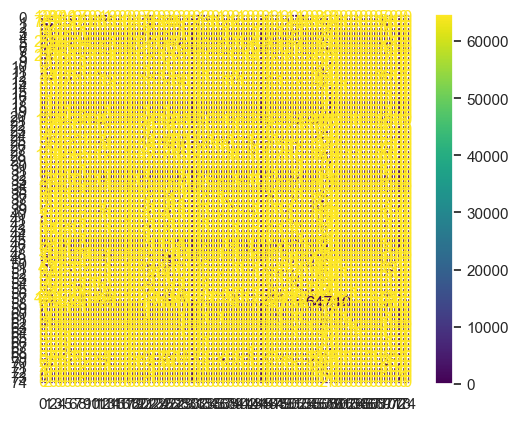

In [86]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_labels, label_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()